In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model  import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC


In [2]:
horse=pd.read_csv("horse.csv")
horse.head()

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,no,adult,530101,38.5,66.0,28.0,cool,reduced,NaN,more_3_sec,...,45.0,8.4,NaN,NaN,died,no,11300,0,0,no
1,yes,adult,534817,39.2,88.0,20.0,NaN,NaN,pale_cyanotic,less_3_sec,...,50.0,85.0,cloudy,2.0,euthanized,no,2208,0,0,no
2,no,adult,530334,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,...,33.0,6.7,NaN,NaN,lived,no,0,0,0,yes
3,yes,young,5290409,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,...,48.0,7.2,serosanguious,5.3,died,yes,2208,0,0,yes
4,no,adult,530255,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_3_sec,...,74.0,7.4,NaN,NaN,died,no,4300,0,0,no


In [3]:
horse.describe()

,hospital_number,rectal_temp,pulse,respiratory_rate,nasogastric_reflux_ph,packed_cell_volume,total_protein,abdomo_protein,lesion_1,lesion_2,lesion_3
count,2.990000e+02,239.000000,275.000000,241.000000,53.000000,270.000000,266.000000,101.000000,299.000000,299.000000,299.000000
mean,1.087733e+06,38.168619,72.000000,30.460581,4.707547,46.307407,24.274436,3.039604,3659.709030,90.528428,7.387960
std,1.532032e+06,0.733744,28.646219,17.666102,1.982311,10.436743,27.364194,1.967947,5408.472421,650.637139,127.749768
min,5.184760e+05,35.400000,30.000000,8.000000,1.000000,23.000000,3.300000,0.100000,0.000000,0.000000,0.000000
25%,5.289040e+05,37.800000,48.000000,18.000000,3.000000,38.000000,6.500000,2.000000,2111.500000,0.000000,0.000000
50%,5.303010e+05,38.200000,64.000000,25.000000,5.000000,45.000000,7.500000,2.300000,2322.000000,0.000000,0.000000
75%,5.347360e+05,38.500000,88.000000,36.000000,6.500000,52.000000,56.750000,3.900000,3209.000000,0.000000,0.000000
max,5.305629e+06,40.800000,184.000000,96.000000,7.500000,75.000000,89.000000,10.100000,41110.000000,7111.000000,2209.000000


In [4]:
horse["lesion_2"].value_counts()

0       292
3111      3
6112      1
7111      1
1400      1
3112      1
Name: lesion_2, dtype: int64

In [5]:
horse["lesion_3"].value_counts()

0       298
2209      1
Name: lesion_3, dtype: int64

In [6]:
horse["lesion_1"].value_counts()

0        56
3111     32
3205     29
2208     20
2205     13
4205     11
2209     11
2124      9
1400      8
31110     7
7111      7
2113      6
2112      5
400       5
3209      4
4300      4
2206      4
5400      4
3112      3
4124      3
2111      3
2207      3
7209      3
5206      2
5124      2
3124      2
5111      2
9400      2
6111      2
2322      2
         ..
3025      2
8400      2
6112      2
11300     1
4122      1
7113      1
6209      1
3115      1
5000      1
3133      1
4111      1
3400      1
300       1
12208     1
9000      1
5205      1
1111      1
1124      1
8300      1
2305      1
4206      1
4207      1
21110     1
2300      1
3207      1
11400     1
7400      1
3113      1
3300      1
41110     1
Name: lesion_1, Length: 61, dtype: int64

In [7]:
horse.isna().sum()

surgery                    0
age                        0
hospital_number            0
rectal_temp               60
pulse                     24
respiratory_rate          58
temp_of_extremities       56
peripheral_pulse          69
mucous_membrane           47
capillary_refill_time     32
pain                      55
peristalsis               44
abdominal_distention      56
nasogastric_tube         104
nasogastric_reflux       106
nasogastric_reflux_ph    246
rectal_exam_feces        102
abdomen                  118
packed_cell_volume        29
total_protein             33
abdomo_appearance        165
abdomo_protein           198
outcome                    0
surgical_lesion            0
lesion_1                   0
lesion_2                   0
lesion_3                   0
cp_data                    0
dtype: int64

In [8]:
horse.drop(["nasogastric_tube","nasogastric_reflux","nasogastric_reflux_ph","rectal_exam_feces","abdomen","abdomo_appearance","abdomo_protein","lesion_2","lesion_3"],axis=1,inplace=True)

In [9]:
horse.head()

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,packed_cell_volume,total_protein,outcome,surgical_lesion,lesion_1,cp_data
0,no,adult,530101,38.5,66.0,28.0,cool,reduced,NaN,more_3_sec,extreme_pain,absent,severe,45.0,8.4,died,no,11300,no
1,yes,adult,534817,39.2,88.0,20.0,NaN,NaN,pale_cyanotic,less_3_sec,mild_pain,absent,slight,50.0,85.0,euthanized,no,2208,no
2,no,adult,530334,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,mild_pain,hypomotile,none,33.0,6.7,lived,no,0,yes
3,yes,young,5290409,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,depressed,absent,severe,48.0,7.2,died,yes,2208,yes
4,no,adult,530255,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_3_sec,NaN,NaN,NaN,74.0,7.4,died,no,4300,no


In [10]:
horse.info()
horse.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 19 columns):
surgery                  299 non-null object
age                      299 non-null object
hospital_number          299 non-null int64
rectal_temp              239 non-null float64
pulse                    275 non-null float64
respiratory_rate         241 non-null float64
temp_of_extremities      243 non-null object
peripheral_pulse         230 non-null object
mucous_membrane          252 non-null object
capillary_refill_time    267 non-null object
pain                     244 non-null object
peristalsis              255 non-null object
abdominal_distention     243 non-null object
packed_cell_volume       270 non-null float64
total_protein            266 non-null float64
outcome                  299 non-null object
surgical_lesion          299 non-null object
lesion_1                 299 non-null int64
cp_data                  299 non-null object
dtypes: float64(5), int64(2), object(

Index(['surgery', 'age', 'hospital_number', 'rectal_temp', 'pulse',
       'respiratory_rate', 'temp_of_extremities', 'peripheral_pulse',
       'mucous_membrane', 'capillary_refill_time', 'pain', 'peristalsis',
       'abdominal_distention', 'packed_cell_volume', 'total_protein',
       'outcome', 'surgical_lesion', 'lesion_1', 'cp_data'],
      dtype='object')

In [11]:
horse.shape

(299, 19)

In [12]:
horse["outcome"].value_counts()

lived         178
died           77
euthanized     44
Name: outcome, dtype: int64

In [13]:
horse.isna().sum()

surgery                   0
age                       0
hospital_number           0
rectal_temp              60
pulse                    24
respiratory_rate         58
temp_of_extremities      56
peripheral_pulse         69
mucous_membrane          47
capillary_refill_time    32
pain                     55
peristalsis              44
abdominal_distention     56
packed_cell_volume       29
total_protein            33
outcome                   0
surgical_lesion           0
lesion_1                  0
cp_data                   0
dtype: int64

In [14]:
for i in horse.columns:
    if((i == "hospital_number") or (i == "rectal_temp") or (i == "pulse") or (i == "respiratory_rate") or (i == "nasogastric_reflux_ph") or (i == "packed_cell_volume")or (i == "total_protein") or (i == "abdomo_protein") or (i == "lesion_1") or (i == "lesion_2") or (i == "lesion_3")):
        if (horse[i].isna().sum()!=0):
            horse[i].fillna(horse[i].mean(),inplace=True)
    else:
        if (horse[i].isna().sum()!=0):
            horse[i].fillna(horse[i].mode()[0],inplace=True)

In [15]:
horse.isna().sum()

surgery                  0
age                      0
hospital_number          0
rectal_temp              0
pulse                    0
respiratory_rate         0
temp_of_extremities      0
peripheral_pulse         0
mucous_membrane          0
capillary_refill_time    0
pain                     0
peristalsis              0
abdominal_distention     0
packed_cell_volume       0
total_protein            0
outcome                  0
surgical_lesion          0
lesion_1                 0
cp_data                  0
dtype: int64

In [16]:
le=preprocessing.LabelEncoder()
for i in horse.columns:
    if((i != "hospital_number") and  (i != "rectal_temp") and (i != "pulse") and (i != "respiratory_rate") and (i != "nasogastric_reflux_ph") and  (i != "packed_cell_volume")and  (i != "total_protein") and (i != "abdomo_protein") and (i != "lesion_1") and (i != "lesion_2") and (i != "lesion_3")):
        horse[i]=le.fit_transform(horse[i])
        
horse.head(3)

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,packed_cell_volume,total_protein,outcome,surgical_lesion,lesion_1,cp_data
0,0,0,530101,38.5,66.0,28.0,1,3,3,2,2,0,2,45.0,8.4,0,0,11300,0
1,1,0,534817,39.2,88.0,20.0,1,2,4,1,3,0,3,50.0,85.0,1,0,2208,0
2,0,0,530334,38.3,40.0,24.0,2,2,5,1,3,2,1,33.0,6.7,2,0,0,1


In [17]:
outcome=horse["outcome"]
horse=horse.drop("outcome",axis=1)


In [18]:
scaler = MinMaxScaler()

norm_horse= pd.DataFrame(scaler.fit_transform(horse))
norm_horse.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.0,0.0,0.002428,0.574074,0.233766,0.227273,0.333333,1.000000,0.6,1.0,0.50,0.000000,0.666667,0.423077,0.059510,0.0,0.274872,0.0
1,1.0,0.0,0.003414,0.703704,0.376623,0.136364,0.333333,0.666667,0.8,0.5,0.75,0.000000,1.000000,0.519231,0.953326,0.0,0.053710,0.0
2,0.0,0.0,0.002477,0.537037,0.064935,0.181818,0.666667,0.666667,1.0,0.5,0.75,0.666667,0.333333,0.192308,0.039673,0.0,0.000000,1.0


In [19]:
norm_horse.columns=["surgery","age","hospital_number","rectal_temp","pulse","respiratory_rate","temp_of_extremities","peripheral_pulse","mucous_membrane","capillary_refill_time","pain","peristalsis","abdominal_distention","packed_cell_volume","total_protein","surgical_lesion","lesion_1","cp_data"]

In [20]:
norm_horse.head(3)

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,packed_cell_volume,total_protein,surgical_lesion,lesion_1,cp_data
0,0.0,0.0,0.002428,0.574074,0.233766,0.227273,0.333333,1.000000,0.6,1.0,0.50,0.000000,0.666667,0.423077,0.059510,0.0,0.274872,0.0
1,1.0,0.0,0.003414,0.703704,0.376623,0.136364,0.333333,0.666667,0.8,0.5,0.75,0.000000,1.000000,0.519231,0.953326,0.0,0.053710,0.0
2,0.0,0.0,0.002477,0.537037,0.064935,0.181818,0.666667,0.666667,1.0,0.5,0.75,0.666667,0.333333,0.192308,0.039673,0.0,0.000000,1.0


In [21]:
norm_horse["outcome"]=outcome
norm_horse.head(3)

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,packed_cell_volume,total_protein,surgical_lesion,lesion_1,cp_data,outcome
0,0.0,0.0,0.002428,0.574074,0.233766,0.227273,0.333333,1.000000,0.6,1.0,0.50,0.000000,0.666667,0.423077,0.059510,0.0,0.274872,0.0,0
1,1.0,0.0,0.003414,0.703704,0.376623,0.136364,0.333333,0.666667,0.8,0.5,0.75,0.000000,1.000000,0.519231,0.953326,0.0,0.053710,0.0,1
2,0.0,0.0,0.002477,0.537037,0.064935,0.181818,0.666667,0.666667,1.0,0.5,0.75,0.666667,0.333333,0.192308,0.039673,0.0,0.000000,1.0,2


In [22]:
norm_horse.var().sort_values()

rectal_temp              0.014746
lesion_1                 0.017308
pulse                    0.031815
respiratory_rate         0.032457
packed_cell_volume       0.036363
peripheral_pulse         0.043815
capillary_refill_time    0.050908
temp_of_extremities      0.068528
age                      0.074072
mucous_membrane          0.088445
total_protein            0.090664
peristalsis              0.093765
pain                     0.098936
hospital_number          0.102419
abdominal_distention     0.122117
cp_data                  0.222217
surgical_lesion          0.232430
surgery                  0.240399
outcome                  0.741218
dtype: float64

In [23]:
x=norm_horse.loc[:,["surgery","surgical_lesion","cp_data","outcome","abdominal_distention","hospital_number","pain","peristalsis","total_protein"]]

In [24]:
x.corr()

,surgery,surgical_lesion,cp_data,outcome,abdominal_distention,hospital_number,pain,peristalsis,total_protein
surgery,1.000000,0.605023,0.005827,-0.189222,-0.150197,0.126044,0.228871,-0.061546,0.042420
surgical_lesion,0.605023,1.000000,0.045630,-0.332933,-0.149064,0.102425,0.276427,-0.148574,-0.113224
cp_data,0.005827,0.045630,1.000000,-0.078066,0.101150,0.096711,0.029084,0.046158,-0.429219
outcome,-0.189222,-0.332933,-0.078066,1.000000,0.112309,-0.106396,-0.161964,0.165844,0.245657
abdominal_distention,-0.150197,-0.149064,0.101150,0.112309,1.000000,-0.080212,-0.065390,-0.027118,-0.012287
hospital_number,0.126044,0.102425,0.096711,-0.106396,-0.080212,1.000000,0.120780,0.065362,-0.212407
pain,0.228871,0.276427,0.029084,-0.161964,-0.065390,0.120780,1.000000,-0.024363,-0.075915
peristalsis,-0.061546,-0.148574,0.046158,0.165844,-0.027118,0.065362,-0.024363,1.000000,-0.116132
total_protein,0.042420,-0.113224,-0.429219,0.245657,-0.012287,-0.212407,-0.075915,-0.116132,1.000000


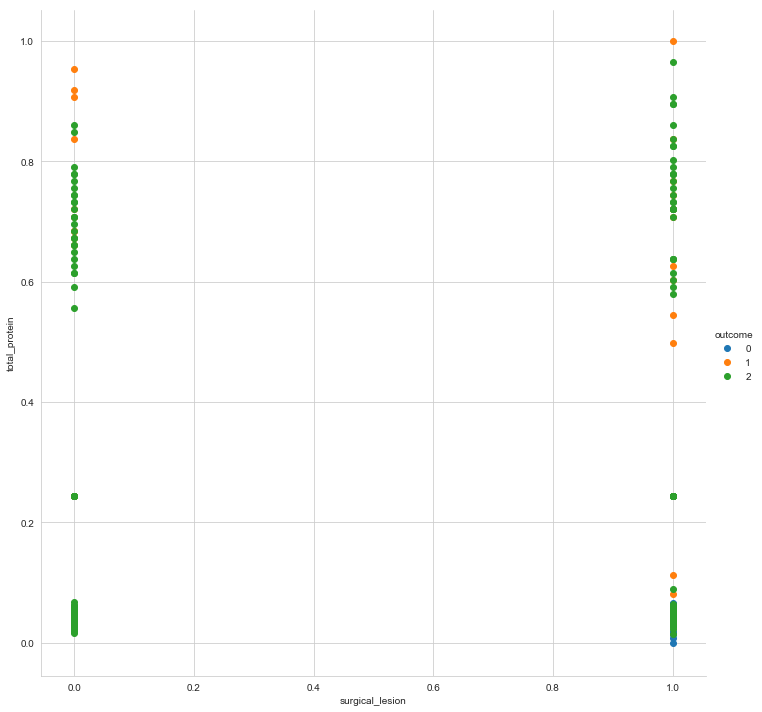

In [25]:
sb.set_style("whitegrid")
sb.FacetGrid(norm_horse,hue="outcome",size=10).map(plt.scatter,"surgical_lesion","total_protein").add_legend()
plt.show() 

In [26]:
feature=norm_horse.loc[:,["surgical_lesion","total_protein"]]
dependent=norm_horse.loc[:,["outcome"]]
horse_train,horse_test,label_train,label_test=train_test_split(feature,dependent,test_size=0.30,random_state=0)
display(horse_train.shape)
display(horse_test.shape)

(209, 2)

(90, 2)

In [27]:
mod=LogisticRegression()
result=[]
mod.fit(horse_train,label_train)
print("train accuracy")
display(mod.score(horse_train,label_train))


print("test accuracy")
display(mod.score(horse_test,label_test))
result.append(mod.score(horse_test,label_test))

train accuracy


0.6220095693779905

test accuracy


0.5555555555555556

In [28]:
train_prediction=mod.predict(horse_train)
test_prediction=mod.predict(horse_test)
train_conf_matrix=confusion_matrix(label_train,train_prediction)
test_conf_matrix=confusion_matrix(label_test,test_prediction)

In [29]:
pd.DataFrame(train_conf_matrix,columns=mod.classes_,index=mod.classes_)

,0,1,2
0,2,0,53
1,0,0,26
2,0,0,128


In [30]:
pd.DataFrame(test_conf_matrix,columns=mod.classes_,index=mod.classes_)

,0,1,2
0,0,0,22
1,0,0,18
2,0,0,50


In [31]:
print(classification_report(label_train,train_prediction))

              precision    recall  f1-score   support

           0       1.00      0.04      0.07        55
           1       0.00      0.00      0.00        26
           2       0.62      1.00      0.76       128

   micro avg       0.62      0.62      0.62       209
   macro avg       0.54      0.35      0.28       209
weighted avg       0.64      0.62      0.49       209



In [32]:
print(classification_report(label_test,test_prediction))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        22
           1       0.00      0.00      0.00        18
           2       0.56      1.00      0.71        50

   micro avg       0.56      0.56      0.56        90
   macro avg       0.19      0.33      0.24        90
weighted avg       0.31      0.56      0.40        90



In [33]:
# decision tree algorithm 

model=DecisionTreeClassifier()

model.fit(horse_train,label_train)
print("train accuracy")
display(model.score(horse_train,label_train))

print("test accuracy")
display(model.score(horse_test,label_test))

train accuracy


0.8181818181818182

test accuracy


0.5333333333333333

In [34]:
# using min_sample_split and min_impurity_decrease

model1=DecisionTreeClassifier(min_samples_split=10,min_impurity_decrease=0.005)

model1.fit(horse_train,label_train)
print("train accuracy")
display(model1.score(horse_train,label_train))

print("test accuracy")
display(model1.score(horse_test,label_test))

train accuracy


0.7081339712918661

test accuracy


0.5555555555555556

In [36]:
model2=DecisionTreeClassifier(min_samples_split=20,min_impurity_decrease=0.1)


model2.fit(horse_train,label_train)
print("train accuracy")
display(model2.score(horse_train,label_train))

print("test accuracy")
display(model2.score(horse_test,label_test))
result.append(model2.score(horse_test,label_test))

train accuracy


0.6124401913875598

test accuracy


0.5555555555555556

In [37]:
# k nearest algorithm    only including DB AND TB since they are correlated with class 


kmodel=KNeighborsClassifier(n_neighbors=3,metric="euclidean")


kmodel.fit(horse_train,label_train)
print("train accuracy")
display(kmodel.score(horse_train,label_train))

print("test accuracy")
display(kmodel.score(horse_test,label_test))
result.append(kmodel.score(horse_test,label_test))

train accuracy


0.7320574162679426

test accuracy


0.6

In [38]:
# changing the n_neighbors value to 5 and validating it


k1model=KNeighborsClassifier(n_neighbors=5,metric="euclidean")
k1model.fit(horse_train,label_train)
print("train accuracy")
display(k1model.score(horse_train,label_train))

print("test accuracy")
display(k1model.score(horse_test,label_test))

train accuracy


0.722488038277512

test accuracy


0.5555555555555556

In [39]:
smodel=SVC(kernel="rbf")
smodel.fit(horse_train,label_train)
print("train accuracy")
display(smodel.score(horse_train,label_train))

print("test accuracy")
display(smodel.score(horse_test,label_test))
result.append(smodel.score(horse_test,label_test))

train accuracy


0.6124401913875598

test accuracy


0.5555555555555556

In [40]:
result

[0.5555555555555556, 0.5555555555555556, 0.6, 0.5555555555555556]

In [41]:
#ensemble techniques KFold technique

from sklearn.model_selection import KFold
k_fold=KFold(n_splits=5,shuffle=False,random_state=100)
km=[1,2,3,4,5]
avg_train=[]
avg_test=[]
X=horse_train
y=label_train
for k in km:
    train_acc=[]
    test_acc=[]
    for i,(train,test) in enumerate(k_fold.split(X,y)):
        kmodel=KNeighborsClassifier(n_neighbors=k,metric="euclidean")
        kmodel.fit(X.iloc[train],y.iloc[train])
        print(model.score(X.iloc[train],y.iloc[train]))
        print(model.score(X.iloc[test],y.iloc[test]))
        train_acc.append(model.score(X.iloc[train],y.iloc[train]))
        test_acc.append(model.score(X.iloc[test],y.iloc[test]))
        print("*********************************************************")
    avg_train.append(np.mean(train_acc))
    avg_test.append(np.mean(test_acc))

0.8143712574850299
0.8333333333333334
*********************************************************
0.8083832335329342
0.8571428571428571
*********************************************************
0.8203592814371258
0.8095238095238095
*********************************************************
0.8323353293413174
0.7619047619047619
*********************************************************
0.8154761904761905
0.8292682926829268
*********************************************************
0.8143712574850299
0.8333333333333334
*********************************************************
0.8083832335329342
0.8571428571428571
*********************************************************
0.8203592814371258
0.8095238095238095
*********************************************************
0.8323353293413174
0.7619047619047619
*********************************************************
0.8154761904761905
0.8292682926829268
*********************************************************
0.8143712574850299
0.8333333333333334
**

In [42]:
print(np.max(avg_train))
print(np.max(avg_test))

0.8181850584545195
0.8182346109175377


In [43]:
## RandomForestClassifier

from sklearn.ensemble import RandomForestClassifier
rmodel=RandomForestClassifier(n_estimators=10,min_samples_split=20,min_impurity_decrease=0.1)
rmodel.fit(horse_train,label_train)
print("train accuracy")
display(rmodel.score(horse_train,label_train))

print("test accuracy")
display(rmodel.score(horse_test,label_test))


train accuracy


0.6124401913875598

test accuracy


0.5555555555555556

In [44]:
from sklearn.ensemble import AdaBoostClassifier
amodel=AdaBoostClassifier(n_estimators=10)
amodel.fit(horse_train,label_train)
print("train accuracy")
display(amodel.score(horse_train,label_train))

print("test accuracy")
display(amodel.score(horse_test,label_test))


train accuracy


0.6507177033492823

test accuracy


0.5888888888888889

'lr'

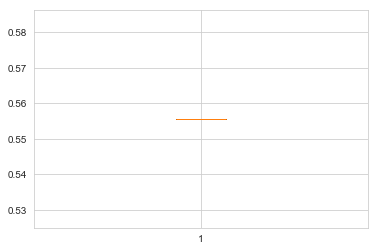

'dt'

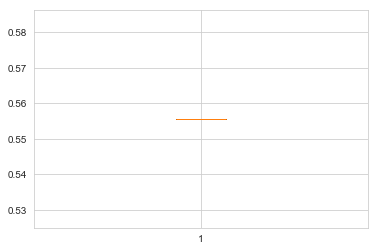

'knn'

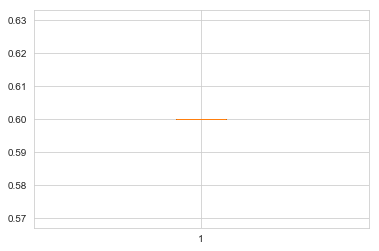

'svm'

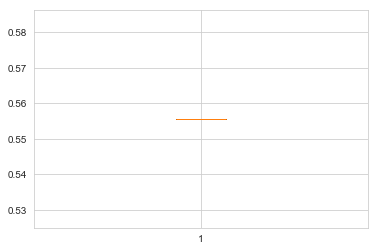

In [52]:
names=["lr","dt","knn","svm"]
for i in range(0,len(result)):
    display(names[i])
    plt.boxplot(result[i])
    
    plt.show()

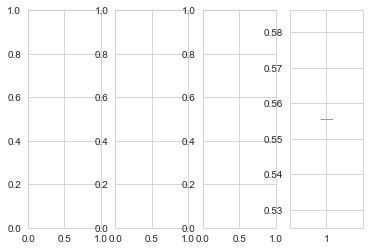

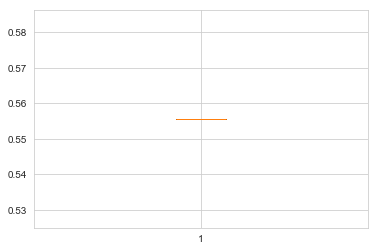

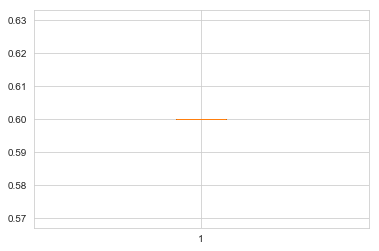

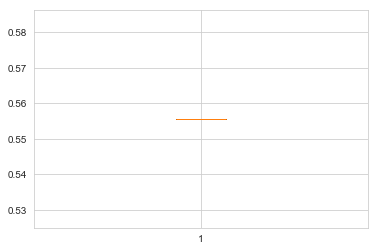

In [79]:
fig, (fig1,fig2,fig3,fig4) = plt.subplots(1, 4)

for i in range(0,len(result)):
    plt.boxplot(result[i])
    plt.show()